In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import matplotlib as mpl
import warnings
import glob

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')


# df_fleats = pd.read_csv('data/marketing-breakdown-detailed.csv')
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (2).csv'))
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (3).csv'))
# df_fleats = df_fleats.append(pd.read_csv('data/marketing-breakdown-detailed (4).csv'))
# read whole year data
allFiles = glob.glob("data/*.csv")
df_fleats = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,parse_dates=False)
    list_.append(df)
df_fleats = pd.concat(list_)

In [2]:
selected_features = ['Marketing Code','Suburb', 'State','Post Code','Classification','Enquired',
                     'Loan Amount','loan_reason','property_use']
target = 'Enquiry Status';
whole_set = selected_features + [target]

df = df_fleats[whole_set]
# df = df.replace('On Hold','Rejected')
# convert loan amount to number type, and change string to NaN
df['Loan Amount'] = pd.to_numeric(df['Loan Amount'],errors='coerce')
df = df.dropna(axis=0, how='any')
df = df[~df[target].isin(['In Progress','Just Received','On Hold'])]

In [3]:
df['Enquired'] = pd.DatetimeIndex(df['Enquired'])
df['Loan Amount'] = df['Loan Amount'].astype(int)
df['Post Code'] = df['Post Code'].astype(int)

In [4]:
from datetime import datetime
from dateutil.parser import parse

# filter years
start_date = '2017-01-01' 
end_date = '2017-12-31'
mask = (df['Enquired'] > start_date) & (df['Enquired'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

# remove Year feature since it is not important (show below random forest)
# df['Year'] = df['Enquired'].dt.year
df['Month'] = df['Enquired'].dt.month
df['Day'] = df['Enquired'].dt.day
df['Hour'] = df['Enquired'].dt.hour
df['Weekday'] = df['Enquired'].dt.weekday_name

df = df.loc[:,df.columns != 'Enquired']

In [5]:
df.groupby(target).mean()

,Post Code,Loan Amount,Month,Day,Hour
Enquiry Status,,,,,
Accepted,3296.861823,459434.523735,5.217963,15.230444,14.235569
Rejected,3468.528074,429404.776626,5.063533,16.204616,14.093663


In [6]:
df.groupby(target).describe()

Day                                                   \
                  count       mean       std  min  25%   50%   75%   max   
Enquiry Status                                                             
Accepted         4487.0  15.230444  9.076454  1.0  7.0  15.0  23.0  31.0   
Rejected        23830.0  16.204616  9.256924  1.0  8.0  16.0  25.0  31.0   

                   Hour              ...   Month       Post Code               \
                  count       mean   ...     75%   max     count         mean   
Enquiry Status                       ...                                        
Accepted         4487.0  14.235569   ...     8.0  11.0    4487.0  3296.861823   
Rejected        23830.0  14.093663   ...     7.0  12.0   23830.0  3468.528074   

                                                                    
                        std    min     25%     50%     75%     max  
Enquiry Status                                                      
Accepted        1256.811963  800.0  2259.0  3004.0  4074.5  7325.0  
Rejected        1356.515618    0.0  2325.0  3065.0  4217.0  7470.0  

[2 rows x 40 columns]

In [7]:
# import random
# import matplotlib.dates as mdates
# import matplotlib.mlab as mlab

# # generate some random data (approximately over 5 years)
# data_1 = df[['Enquiry Status','Day']]
# data_2 = df[['Enquiry Status','Hour']]

# plot_date = data_1.groupby(['Day', 'Enquiry Status']).size().reset_index(name="counts")
# plot_date = plot_date.loc[plot_date['Enquiry Status'] == 'Accepted']

# plot_time = data_2.groupby(['Hour', 'Enquiry Status']).size().reset_index(name="counts")
# plot_time = plot_time.loc[plot_time['Enquiry Status'] == 'Accepted']

# plt.xlabel('Accpetances by hour')
# plt.ylabel('Acceptances')
# plt.plot(plot_time['Hour'], plot_time['counts'])

# plt.title('Accpeted counts by Hour')
# plt.bar(range(plot_time['Hour'].shape[0]), plot_time['counts'])
# plt.xticks(range(plot_time['Hour'].shape[0]),plot_time['Hour'].values)
# # plt.xticks(rotation=90)
# plt.show()

In [8]:
# import calendar

# plt_accepted = df.loc[df['Enquiry Status'] == 'Accepted']

# # get and sort acceptances by day
# count_day_accepted = plt_accepted.groupby(['Weekday']).size().reset_index(name="counts")
# weekdays = list(calendar.day_name)
# mapping = {day: i for i, day in enumerate(weekdays)}
# key = count_day_accepted['Weekday'].map(mapping)
# count_day_accepted = count_day_accepted.iloc[key.argsort()].reset_index(drop=True)


# plt_rejected = df.loc[df['Enquiry Status'] == 'Rejected']

# count_day_rejected = plt_rejected.groupby(['Weekday']).size().reset_index(name="counts")
# weekdays = list(calendar.day_name)
# mapping = {day: i for i, day in enumerate(weekdays)}
# key = count_day_rejected['Weekday'].map(mapping)
# count_day_rejected = count_day_rejected.iloc[key.argsort()].reset_index(drop=True)



# plt_X1 = plt_accepted[['Loan Amount','Weekday']]
# plt_y1 = plt_accepted[['Enquiry Status']]

# # ax = count_day.plot()
# # ax.set_xlabel("Day")
# # plt.plot_date(x=count_day['day_of_week'], y=count_day['counts'],fmt="r-")
# # plt.plot_date(x=count_date['Enquired Date'], y=count_date['counts'],fmt="r-")

# # plt.plot(count_day_accepted['day_of_week'], count_day_accepted['counts'])
# # plt.xticks(rotation=45)
# # plt.show()

# # print(count_day_accepted['day_of_week'].shape[0])
# plt.title('Accpeted counts by day')
# plt.bar(range(count_day_accepted['Weekday'].shape[0]), count_day_accepted['counts'])
# plt.xticks(range(count_day_accepted['Weekday'].shape[0]),count_day_accepted['Weekday'].values, rotation=45)
# plt.show()

# plt.title('Rejected counts by day')
# plt.bar(range(count_day_rejected['Weekday'].shape[0]), count_day_rejected['counts'])
# plt.xticks(range(count_day_rejected['Weekday'].shape[0]),count_day_rejected['Weekday'].values, rotation=45)
# plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
#                 output[col] = OneHotEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = le.fit_transform(col)
#                 output[colname] = OneHotEncoder().fit_transform(col)
        return output
       

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
print("List of data types: \n{}".format(df.dtypes))

encoded_columns = list(df.select_dtypes(include=['category','object']))

print("selected encoded_columns: \n{}".format(encoded_columns))

df = MultiColumnLabelEncoder(columns = encoded_columns).fit_transform(df)

List of data types: 
Marketing Code    object
Suburb            object
State             object
Post Code          int64
Classification    object
Loan Amount        int64
loan_reason       object
property_use      object
Enquiry Status    object
Month              int64
Day                int64
Hour               int64
Weekday           object
dtype: object
selected encoded_columns: 
['Marketing Code', 'Suburb', 'State', 'Classification', 'loan_reason', 'property_use', 'Enquiry Status', 'Weekday']


In [11]:
df.describe()

,Marketing Code,Suburb,State,Post Code,Classification,Loan Amount,loan_reason,property_use,Enquiry Status,Month,Day,Hour,Weekday
count,28317.000000,28317.000000,28317.000000,28317.000000,28317.000000,2.831700e+04,28317.000000,28317.000000,28317.000000,28317.000000,28317.000000,28317.000000,28317.000000
mean,124.095632,2386.856023,3.161634,3441.326518,8.685242,4.341632e+05,4.576403,2.522901,0.841544,5.088004,16.050252,14.116149,3.070170
std,64.510469,1381.166840,2.349565,1342.654141,7.542509,5.019847e+05,4.622109,1.143355,0.365175,2.931775,9.235258,5.540936,1.973063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,65.000000,1141.000000,1.000000,2320.000000,2.000000,2.400000e+05,0.000000,3.000000,1.000000,3.000000,8.000000,10.000000,1.000000
50%,138.000000,2390.000000,3.000000,3053.000000,6.000000,3.700000e+05,4.000000,3.000000,1.000000,4.000000,16.000000,14.000000,3.000000
75%,166.000000,3591.000000,6.000000,4211.000000,15.000000,5.150000e+05,4.000000,3.000000,1.000000,7.000000,25.000000,19.000000,5.000000
max,256.000000,4798.000000,7.000000,7470.000000,31.000000,1.000000e+07,15.000000,6.000000,1.000000,12.000000,31.000000,23.000000,6.000000


In [12]:
df.corr()

,Marketing Code,Suburb,State,Post Code,Classification,Loan Amount,loan_reason,property_use,Enquiry Status,Month,Day,Hour,Weekday
Marketing Code,1.000000,-0.024646,-0.094254,-0.081806,0.039353,0.032599,-0.380523,-0.054720,0.008652,-0.282919,0.020374,0.100513,-0.030195
Suburb,-0.024646,1.000000,0.052442,0.023464,-0.022777,0.007458,0.031243,0.001009,-0.000124,-0.002315,0.004422,0.002936,-0.013030
State,-0.094254,0.052442,1.000000,0.637065,0.097481,-0.087027,0.109518,0.055920,0.048168,0.057658,-0.005081,-0.013131,-0.001449
Post Code,-0.081806,0.023464,0.637065,1.000000,0.059047,-0.136705,0.111523,0.071989,0.046690,0.042065,0.001719,-0.018084,-0.006084
Classification,0.039353,-0.022777,0.097481,0.059047,1.000000,-0.026997,-0.110786,-0.016853,-0.060241,-0.087117,0.008164,0.026881,0.003482
Loan Amount,0.032599,0.007458,-0.087027,-0.136705,-0.026997,1.000000,-0.066359,0.009940,-0.021845,-0.009727,0.009581,0.014842,-0.009662
loan_reason,-0.380523,0.031243,0.109518,0.111523,-0.110786,-0.066359,1.000000,0.189213,-0.077409,0.202816,-0.007561,-0.056157,0.006183
property_use,-0.054720,0.001009,0.055920,0.071989,-0.016853,0.009940,0.189213,1.000000,0.006112,0.013601,0.010053,0.009294,-0.007264
Enquiry Status,0.008652,-0.000124,0.048168,0.046690,-0.060241,-0.021845,-0.077409,0.006112,1.000000,-0.019235,0.038520,-0.009352,-0.022113
Month,-0.282919,-0.002315,0.057658,0.042065,-0.087117,-0.009727,0.202816,0.013601,-0.019235,1.000000,0.012254,-0.073479,0.018658


In [13]:
# import seaborn as sns
# sns.pairplot(df, hue="Enquiry Status")

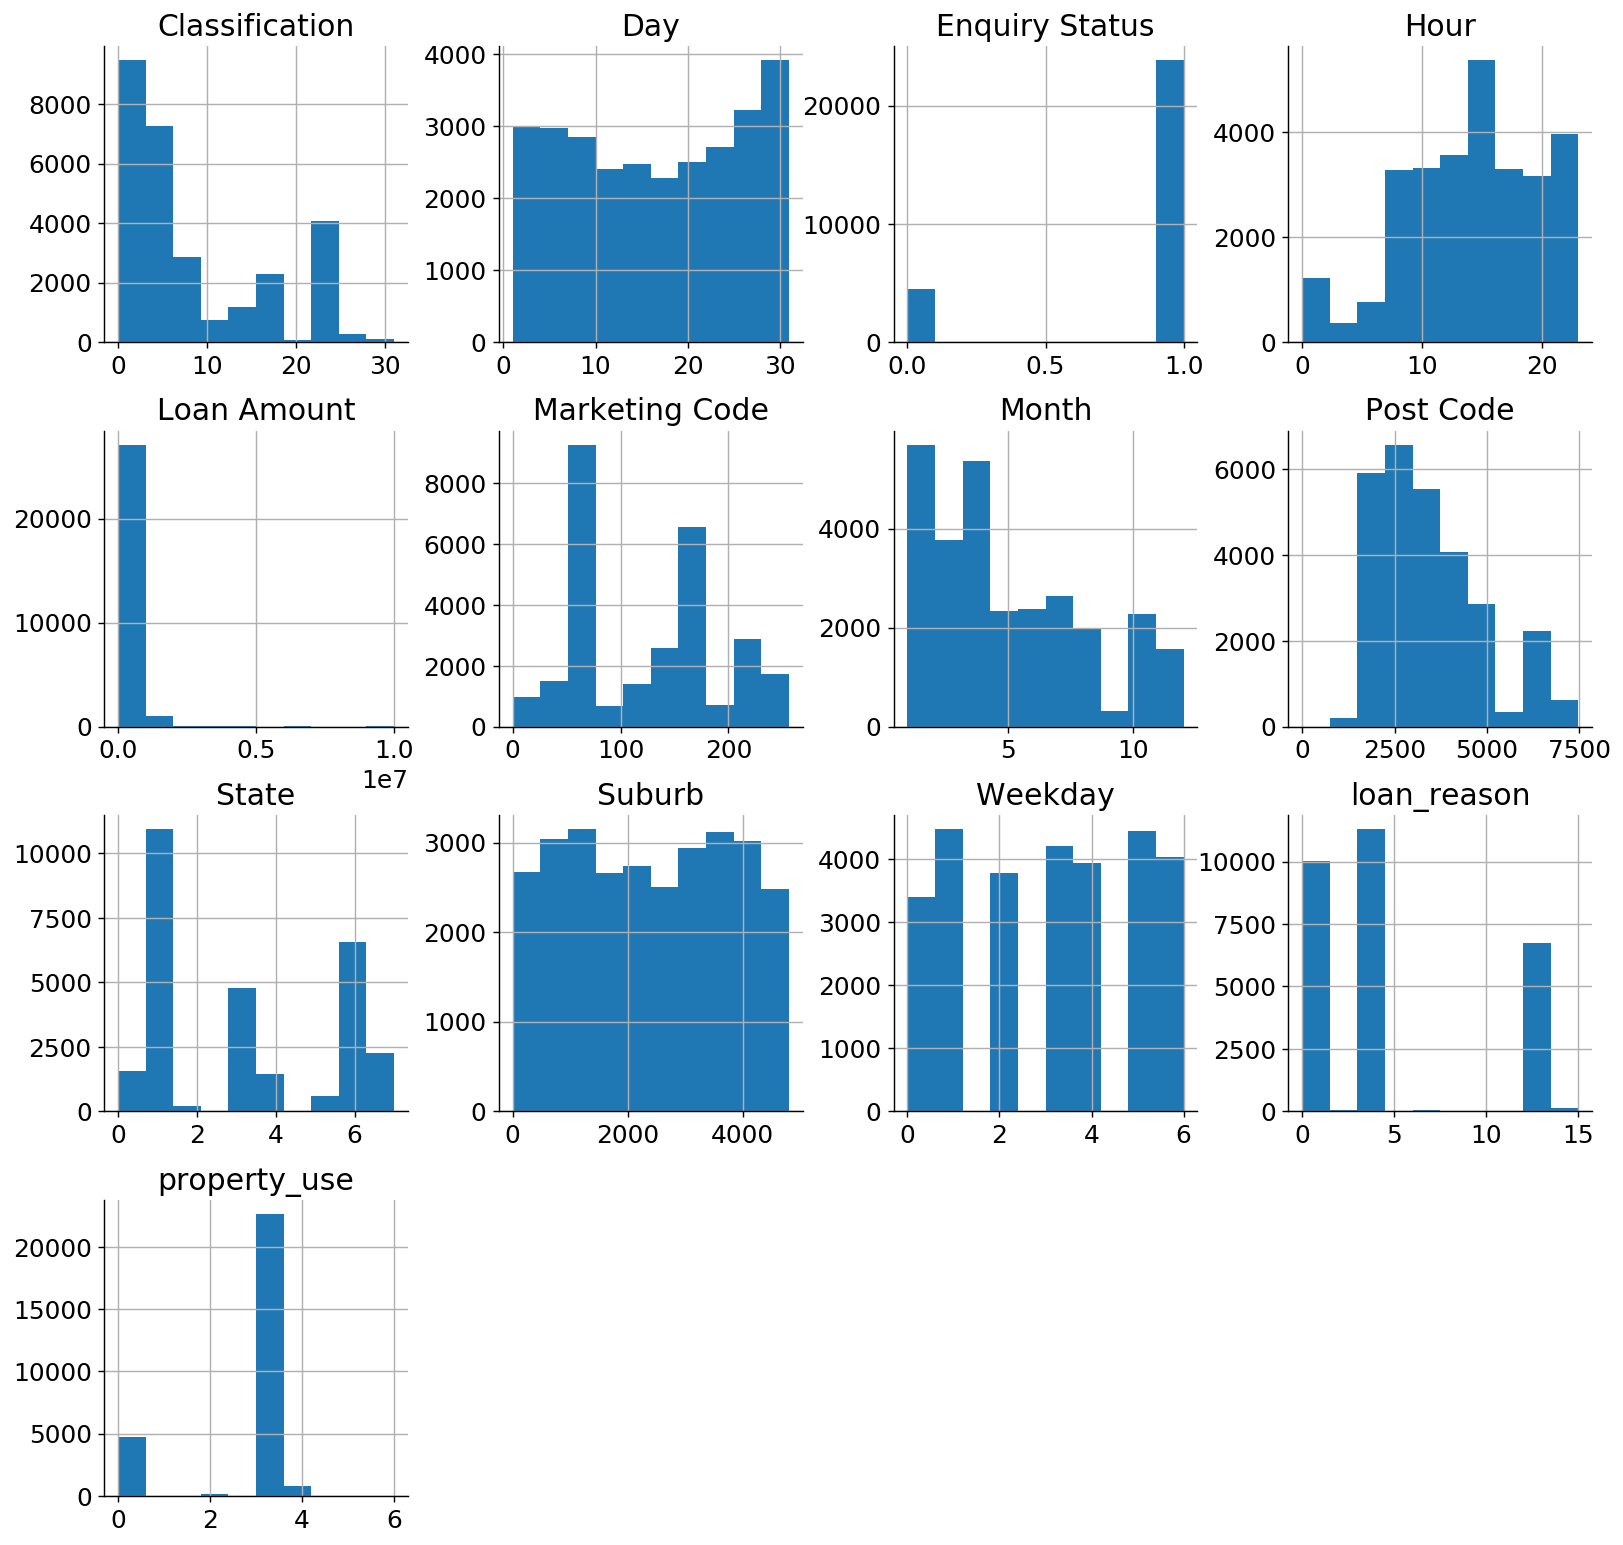

In [14]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [15]:
# X = df[['Marketing Code','App Source', 'Web Source', 'Classification','Enquired Date',]]
X = df[df.keys()]
X = df.loc[:,df.columns != target]
y = df[target]

In [16]:
print("Keys of enquiries_dataset: \n{}".format(X.keys()))

Keys of enquiries_dataset: 
Index(['Marketing Code', 'Suburb', 'State', 'Post Code', 'Classification',
       'Loan Amount', 'loan_reason', 'property_use', 'Month', 'Day', 'Hour',
       'Weekday'],
      dtype='object')


In [17]:
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (28317, 12)
Shape of y: (28317,)


In [18]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
selected_X = model.transform(X)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)
# rescale data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.intercept_)
print(lr.coef_)

Training accuracy: 0.841531708794
Test accuracy: 0.841572504708
[ 1.71284049]
[[-0.089794    0.0067977   0.12286737  0.09661405 -0.21171737 -0.0498095
  -0.28206884  0.03452846 -0.03711949  0.10431258 -0.01719846 -0.02595696]]


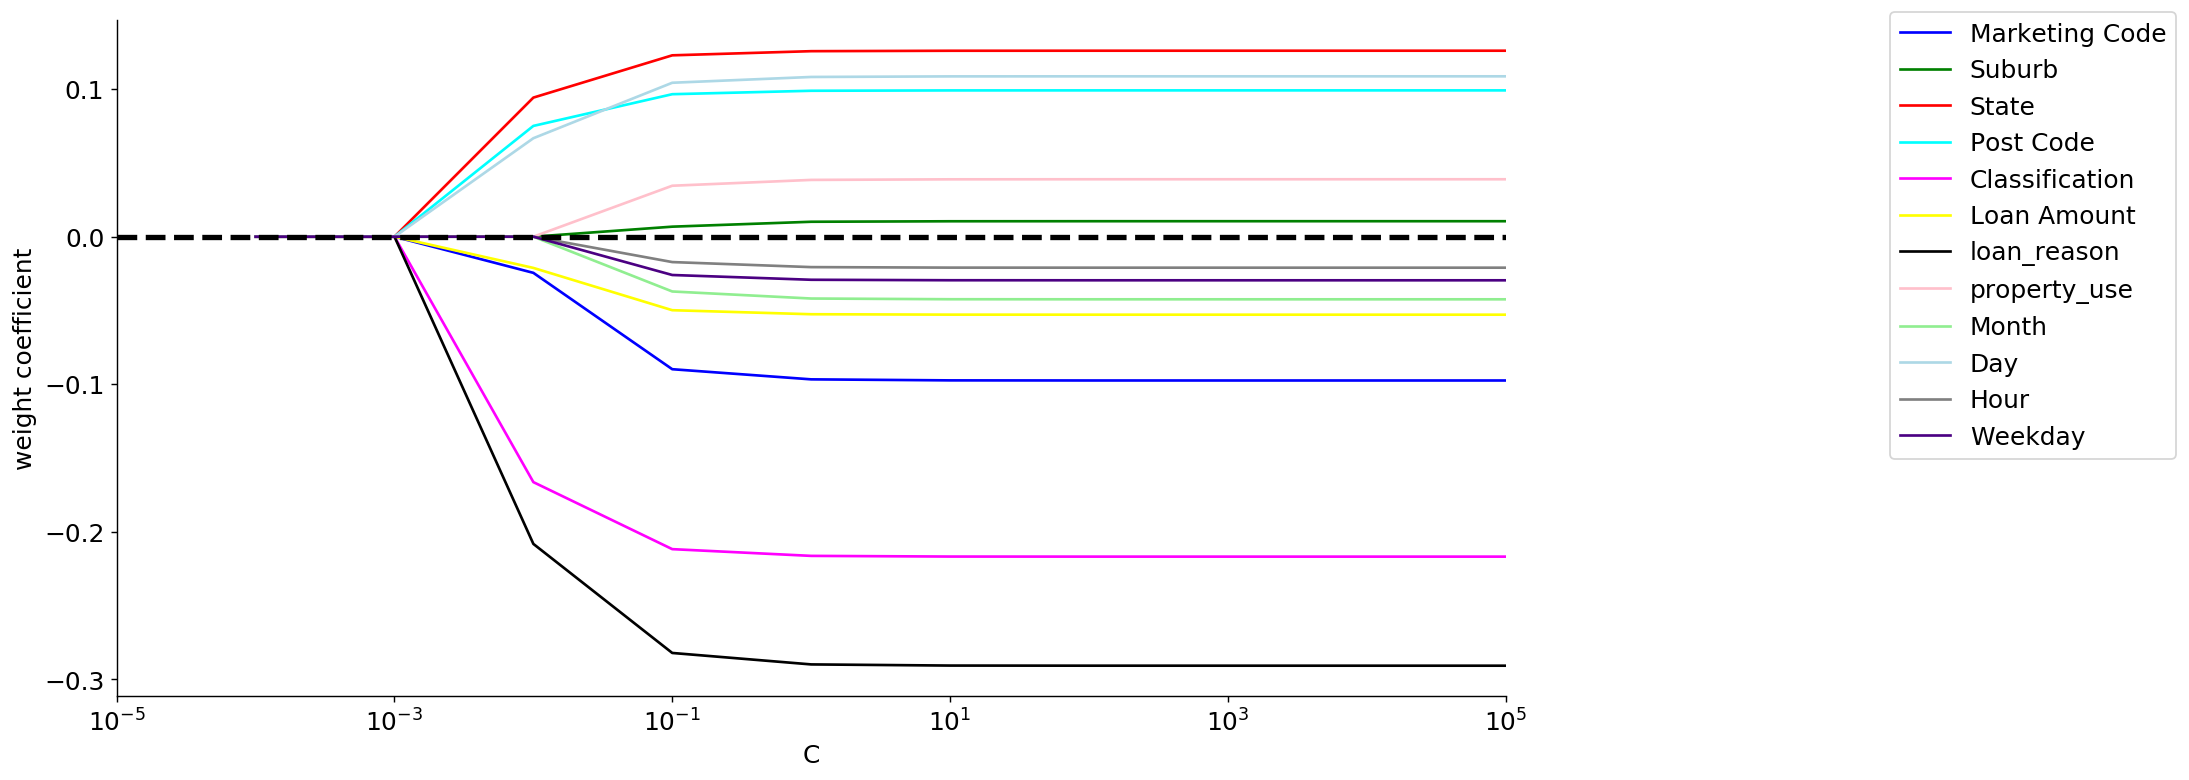

In [21]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10. ** c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10 ** c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column],
             color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

Test score: 0.84


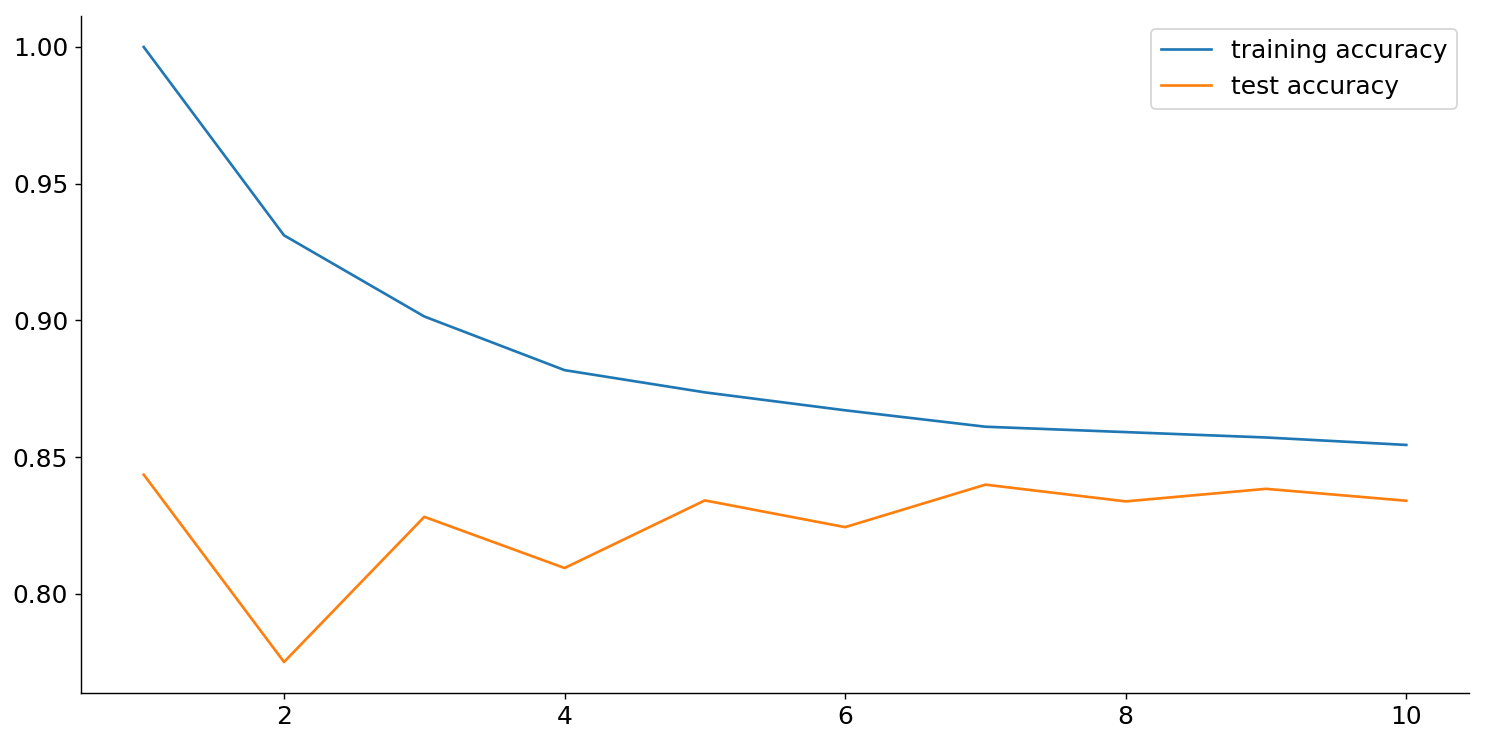

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std, y_train)
pred_kn = knn.predict(X_test)
print("Test score: {:.2f}".format(knn.score(X_test_std, y_test)))


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(X_train_std, y_train)
pred_sgd = sgd.predict(X_test)
print("Test score: {:.2f}".format(sgd.score(X_test_std, y_test)))

Test score: 0.80


In [24]:
from sklearn import svm
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("Test score: {:.2f}".format(svc.score(X_test, y_test)))

scores = cross_val_score(clf, X, y, cv=5)

# N = range(1, 16)
# for n in N:
#     pca = KernelPCA(n_components=n)
#     X_n_kept = pca.fit_transform(X_test_std)
#     # Estimate accuracy on the data set with top n components
#     classifier = svm.SVC(gamma=0.001)
#     score_n_components = cross_val_score(classifier, X_n_kept, y_test).mean()
#     print('Score with the data set of top {0} components: {1:.2f}'.format(n, score_n_components))

Test score: 0.88


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=10,
                            random_state=1)
rfc.fit(X_train_std, y_train)
pred_forest = rfc.predict(X_test)

print("Test score: {:.2f}".format(rfc.score(X_test_std, y_test)))

scores = cross_val_score(rfc, X_test_std, y_test)

Test score: 0.90


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


lr = LogisticRegression()
lr = lr.fit(X_train_std, y_train)
pred_lr = lr.predict(X_test)

print("X_test_std {}".format(X_test_std.shape))
N = range(1, 16)
for n in N:
    pca = KernelPCA(n_components=n)
    X_n_kept = pca.fit_transform(X_test_std)
    print("X_n_kept {}".format(X_n_kept.shape))
    # Estimate accuracy on the data set with top n components
    classifier = LogisticRegression()
    score_n_components = cross_val_score(classifier, X_n_kept, y_test).mean()
    print('Score with the data set of top {0} components: {1:.2f}'.format(n, score_n_components))

X_test_std (8496, 12)
X_n_kept (8496, 1)
Score with the data set of top 1 components: 0.84
X_n_kept (8496, 2)
Score with the data set of top 2 components: 0.84
X_n_kept (8496, 3)
Score with the data set of top 3 components: 0.84
X_n_kept (8496, 4)
Score with the data set of top 4 components: 0.84
X_n_kept (8496, 5)
Score with the data set of top 5 components: 0.84
X_n_kept (8496, 6)
Score with the data set of top 6 components: 0.84
X_n_kept (8496, 7)
Score with the data set of top 7 components: 0.84
X_n_kept (8496, 8)
Score with the data set of top 8 components: 0.84
X_n_kept (8496, 9)
Score with the data set of top 9 components: 0.84
X_n_kept (8496, 10)
Score with the data set of top 10 components: 0.84
X_n_kept (8496, 11)
Score with the data set of top 11 components: 0.84
X_n_kept (8496, 12)
Score with the data set of top 12 components: 0.84
X_n_kept (8496, 13)
Score with the data set of top 13 components: 0.84


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

N = range(1, 16)
for n in N:
    pca = KernelPCA(n_components=n)
    X_n_kept = pca.fit_transform(y_test)
    print("X_n_kept {}".format(X_n_kept.shape))
    # Estimate accuracy on the data set with top n components
    classifier = RandomForestClassifier()
    score_n_components = cross_val_score(classifier, X_n_kept, y_test).mean()
    print('Score with the data set of top {0} components: {1:.2f}'.format(n, score_n_components))

In [ ]:
feat_labels = X.columns[:]
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# from matplotlib.ticker import FuncFormatter
# def millions(x, pos):
#     'The two args are the value and tick position'
#     return '$%1.1fM' % (x*1e-6)

# formatter = FuncFormatter(millions)

# count_amount_accepted = plt_accepted.groupby(['Loan Amount']).size().reset_index(name="counts")
# count_amount_rejected = plt_rejected.groupby(['Loan Amount']).size().reset_index(name="counts")

# # count_amount_accepted.to_csv('test.csv')
# # display(count_amount_accepted)
# fig, ax = plt.subplots()
# plt.plot(count_amount_accepted['Loan Amount'], count_amount_accepted['counts'])
# plt.xticks(rotation=45)
# ax.xaxis.set_major_formatter(formatter)
# plt.show()

In [ ]:
from sklearn import cross_validation
from sklearn.metrics import classification_report


scores = cross_validation.cross_val_score(lr, X, y, cv=5)
print("LogisticRegression cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(knn, X, y, cv=5)
print("KNeighborsClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(sgd, X, y, cv=5)
print("SGDClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(svc, X, y, cv=5)
print("SVC cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

scores = cross_validation.cross_val_score(rfc, X, y, cv=5)
print("RandomForestClassifier cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

print()


print("LogisticRegression")
print(classification_report(y_test, pred_lr))

print("KNeighborsClassifier")
print(classification_report(y_test, pred_kn))

print("SGDClassifier")
print(classification_report(y_test, pred_sgd))

print("SVC")
print(classification_report(y_test, pred_svc))

print("RandomForestClassifier")
print(classification_report(y_test, pred_forest))

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

probs = rfc.predict_proba(X_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Random Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


probs = svc.predict_proba(X_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('SVC Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# input_x = X.iloc[:]
# input_x_test = X.iloc[:,idxs_selected]
# # input_x = input_x.iloc[0,idxs_selected]

# # input_x = input_x.drop('Enquiry Status', 1)

# input_x_test = MultiColumnLabelEncoder(columns = input_x_test.keys()).fit_transform(input_x_test)
# input_x_test = scaler.fit_transform(input_x_test)

# # for row in input_x:
# #     result = rfc.predict(row)[0]
# #     proba = np.max(rfc.predict_proba(row))    

# #     print('reuslt: {}'.format(le.inverse_transform(result)))
# #     print('probability: {0}%'.format(proba))
# #     print()

# # result = rfc.predict(input_x)[0]
# # proba = np.max(rfc.predict_proba(input_x))    

# # print('reuslt: {}'.format(le.inverse_transform(result)))
# # print('probability: {0}%'.format(proba))
# result = rfc.predict(input_x_test)
# result = le.inverse_transform(result)
# proba = rfc.predict_proba(input_x_test)   
# proba = [np.max(p) for p in proba]
# input_x.to_csv('example.csv')

In [ ]:
# input_x = input_x.assign(predict=result.tolist())
# input_x = input_x.assign(possibility=proba)
# input_x.head()
# input_x.to_csv('result/v1.csv')

In [ ]:
a = '[{"col 1":"a","col 2":"b"},{"col 1":"c","col 2":"d"}]'

In [ ]:
# pd.read_json(a, orient='records')
# import json
# test_json = json.dumps(a)
test = pd.read_json(a, orient='records')
test